In [2]:

# Load the datasets
import pandas as pd
customers = pd.read_csv(customers_path.csv)
products = pd.read_csv(products_path.csv)
transactions = pd.read_csv(transactions_path.csv)

# Inspect the datasets
print("Customers Dataset")
print(customers.info(), "\n")
print(customers.head(), "\n")

print("Products Dataset")
print(products.info(), "\n")
print(products.head(), "\n")

print("Transactions Dataset")
print(transactions.info(), "\n")
print(transactions.head(), "\n")


Customers Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None 

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15 

Products Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductI

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# 2. Statistical summary of numeric columns
print("Statistical Summary (Transactions):")
print(transactions.describe(), "\n")


Statistical Summary (Transactions):
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000 



In [5]:
# 3. Check for missing values
print("Missing Values (Customers):\n", customers.isnull().sum(), "\n")
print("Missing Values (Products):\n", products.isnull().sum(), "\n")
print("Missing Values (Transactions):\n", transactions.isnull().sum(), "\n")

Missing Values (Customers):
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64 

Missing Values (Products):
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64 

Missing Values (Transactions):
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64 



no need to handle any missing values as there arent any othwerwise this step is really important


In [6]:
# 4. Count unique values for each column
print("Unique Values (Customers):\n", customers.nunique(), "\n")
print("Unique Values (Products):\n", products.nunique(), "\n")
print("Unique Values (Transactions):\n", transactions.nunique(), "\n")

Unique Values (Customers):
 CustomerID      200
CustomerName    200
Region            4
SignupDate      179
dtype: int64 

Unique Values (Products):
 ProductID      100
ProductName     66
Category         4
Price          100
dtype: int64 

Unique Values (Transactions):
 TransactionID      1000
CustomerID          199
ProductID           100
TransactionDate    1000
Quantity              4
TotalValue          369
Price               100
dtype: int64 



In [7]:
# 5. Value counts for categorical columns
print("Region Distribution (Customers):\n", customers['Region'].value_counts(), "\n")
print("Product Categories:\n", products['Category'].value_counts(), "\n")

Region Distribution (Customers):
 Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64 

Product Categories:
 Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64 



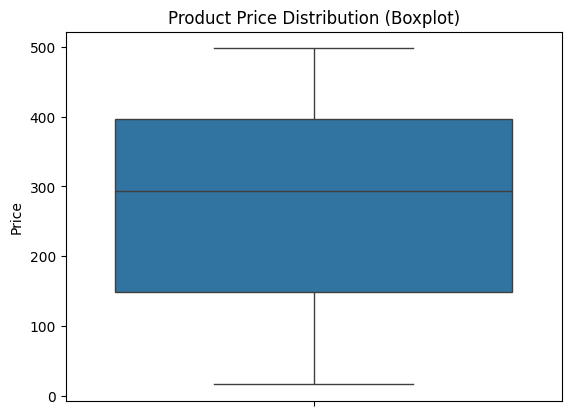

In [8]:
# 6. Boxplot to check for outliers in product price
sns.boxplot(data=products, y='Price')
plt.title("Product Price Distribution (Boxplot)")
plt.show()

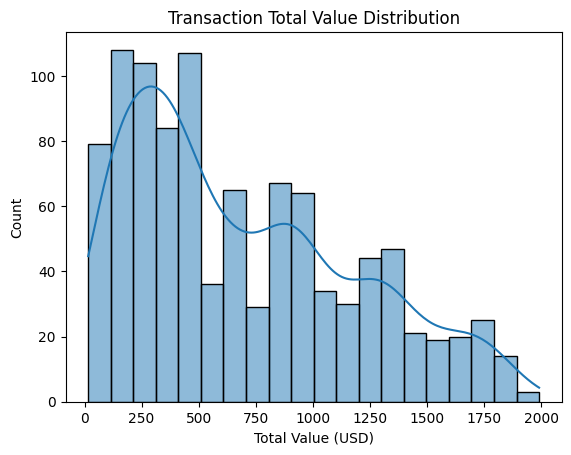

In [9]:
# 7. Histogram for transaction total value
sns.histplot(transactions['TotalValue'], bins=20, kde=True)
plt.title("Transaction Total Value Distribution")
plt.xlabel("Total Value (USD)")
plt.show()

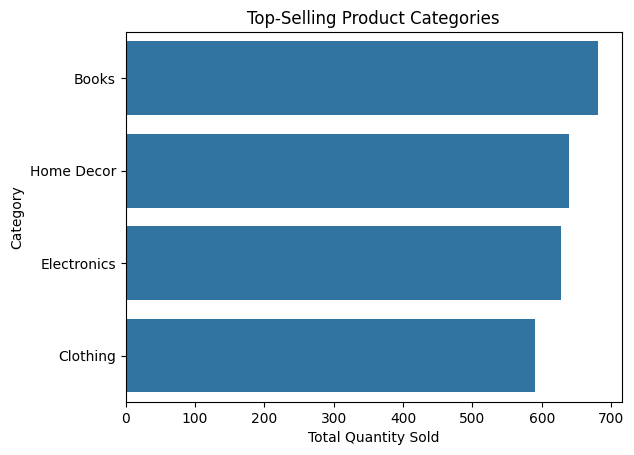

In [10]:
# 8. Bar Plot for top-selling product categories
top_categories = transactions.merge(products, on='ProductID').groupby('Category')['Quantity'].sum().sort_values(ascending=False)
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title("Top-Selling Product Categories")
plt.xlabel("Total Quantity Sold")
plt.show()


Remaining Columns After Dropping Irrelevant Columns:
Index(['Quantity', 'TotalValue', 'Price'], dtype='object')

Numeric Columns for Correlation Analysis:
Index(['Quantity', 'TotalValue', 'Price'], dtype='object')


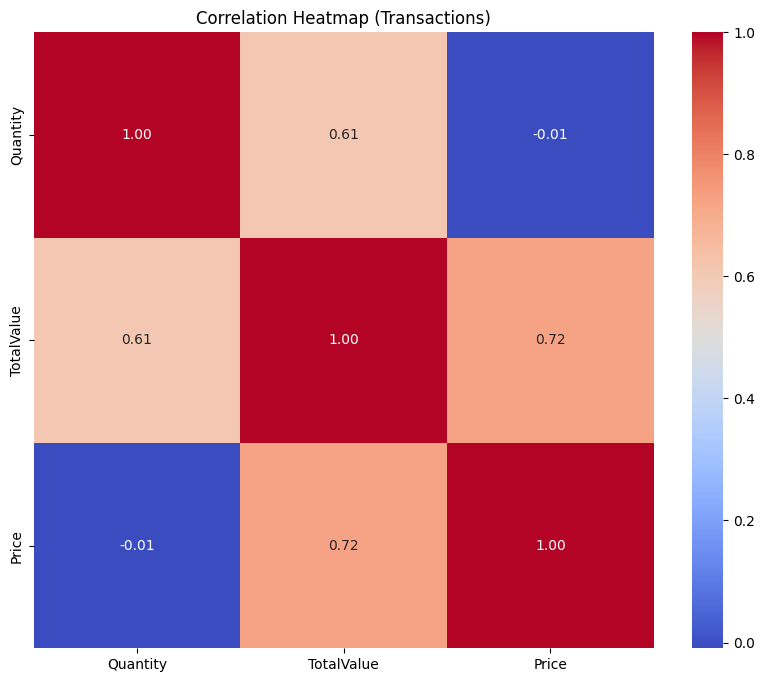

In [11]:
# 2. Drop irrelevant or non-numeric columns
columns_to_drop = ['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate']  # Adjust based on the dataset
transactions_cleaned = transactions.drop(columns=columns_to_drop, errors='ignore')

print("\nRemaining Columns After Dropping Irrelevant Columns:")
print(transactions_cleaned.columns)

# 3. Verify remaining columns are numeric
numeric_columns = transactions_cleaned.select_dtypes(include=[float, int]).columns
print("\nNumeric Columns for Correlation Analysis:")
print(numeric_columns)

# Check if numeric columns are available
if len(numeric_columns) == 0:
    print("No numeric columns available for correlation analysis.")
else:
    # 4. Generate and visualize the correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(transactions_cleaned.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Heatmap (Transactions)")
    plt.show()

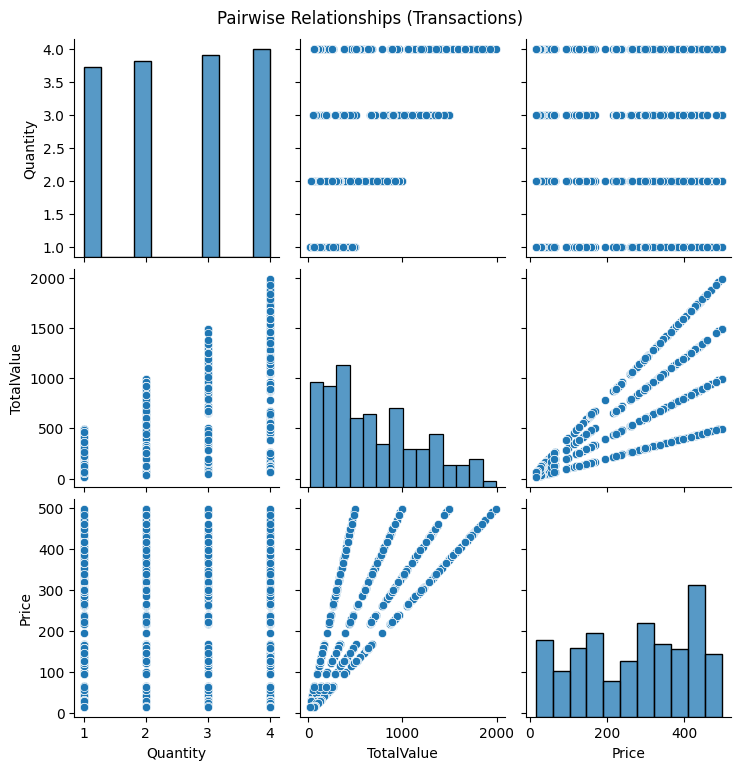

In [12]:
sns.pairplot(transactions[['Quantity', 'TotalValue', 'Price']])
plt.suptitle("Pairwise Relationships (Transactions)", y=1.02)
plt.show()

Customer Distribution by Region:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


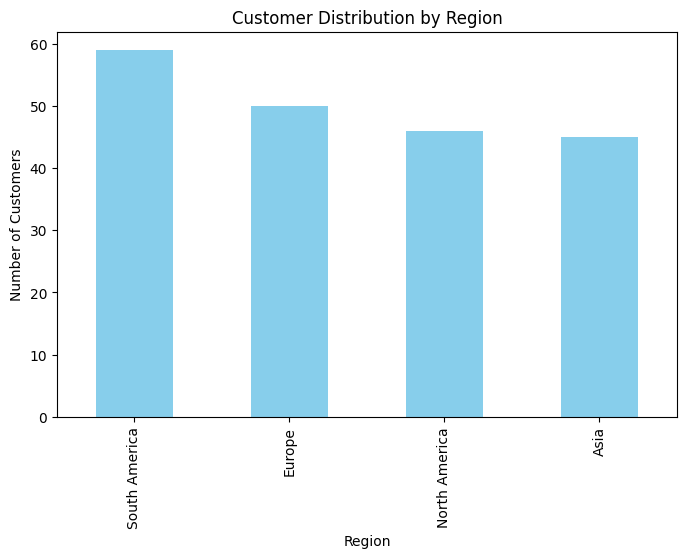

In [13]:
# Customer distribution by region
region_distribution = customers['Region'].value_counts()

# Display distribution
print("Customer Distribution by Region:")
print(region_distribution)

# Visualization
region_distribution.plot(kind='bar', figsize=(8, 5), color='skyblue')
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.show()

Top-Selling Product Categories:
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


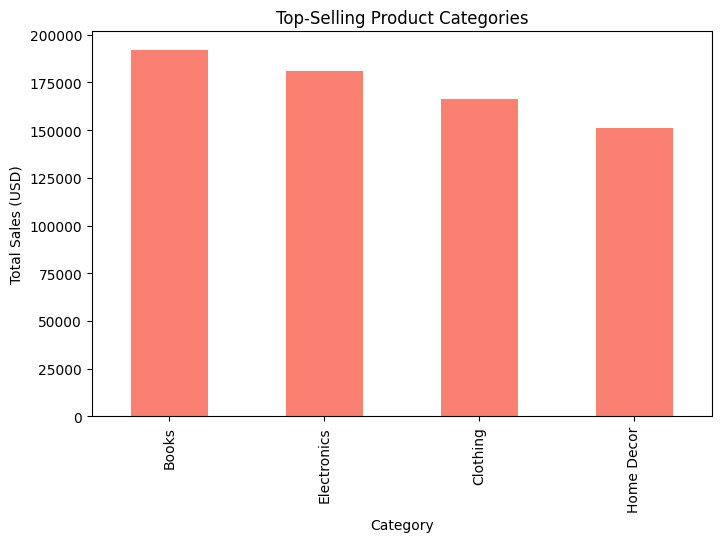

In [14]:
# Merge transactions with products to include category information
transactions_products = transactions.merge(products, on='ProductID')

# Group by category and calculate total sales
category_sales = transactions_products.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)

# Display top categories
print("Top-Selling Product Categories:")
print(category_sales)

# Visualization
category_sales.plot(kind='bar', figsize=(8, 5), color='salmon')
plt.title("Top-Selling Product Categories")
plt.xlabel("Category")
plt.ylabel("Total Sales (USD)")
plt.show()

In [15]:
# Convert TransactionDate to datetime format
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'], errors='coerce')

# Verify the conversion
print(transactions['TransactionDate'].head())

0   2024-08-25 12:38:23
1   2024-05-27 22:23:54
2   2024-04-25 07:38:55
3   2024-03-26 22:55:37
4   2024-03-21 15:10:10
Name: TransactionDate, dtype: datetime64[ns]


      TransactionDate YearMonth
0 2024-08-25 12:38:23   2024-08
1 2024-05-27 22:23:54   2024-05
2 2024-04-25 07:38:55   2024-04
3 2024-03-26 22:55:37   2024-03
4 2024-03-21 15:10:10   2024-03


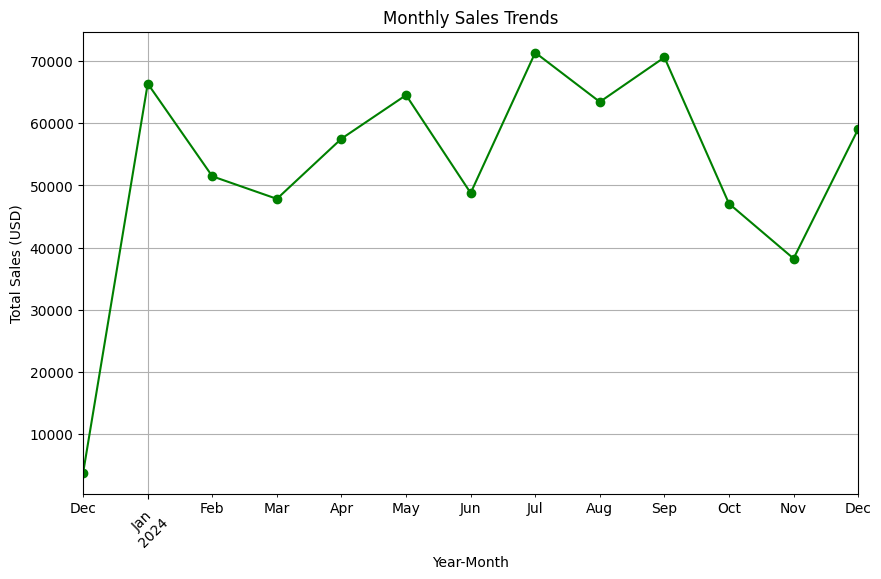

In [16]:
# Extract Year and Month from TransactionDate
transactions['YearMonth'] = transactions['TransactionDate'].dt.to_period('M')

# Check the new column
print(transactions[['TransactionDate', 'YearMonth']].head())

# Group by YearMonth and calculate total sales
monthly_sales = transactions.groupby('YearMonth')['TotalValue'].sum()

# Visualize monthly sales trends
monthly_sales.plot(kind='line', figsize=(10, 6), marker='o', color='green')
plt.title("Monthly Sales Trends")
plt.xlabel("Year-Month")
plt.ylabel("Total Sales (USD)")
plt.xticks(rotation=45)
plt.grid()
plt.show()

Bottom 10 Low-Performing Products:
ProductID
P031     9
P099    11
P024    12
P044    13
P060    13
P090    14
P014    14
P037    15
P100    15
P012    15
Name: Quantity, dtype: int64


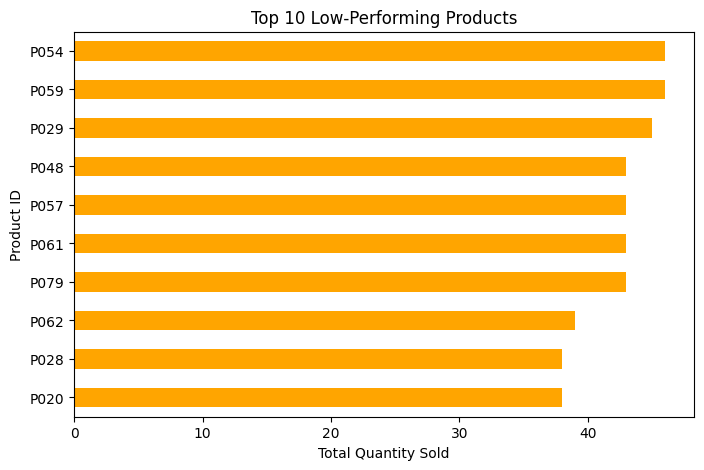

In [17]:
# Group by ProductID and calculate total quantity sold
product_sales = transactions.groupby('ProductID')['Quantity'].sum().sort_values()

# Display bottom 10 products
print("Bottom 10 Low-Performing Products:")
print(product_sales.head(10))

# Visualization
product_sales.tail(10).plot(kind='barh', figsize=(8, 5), color='orange')
plt.title("Top 10 Low-Performing Products")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product ID")
plt.show()

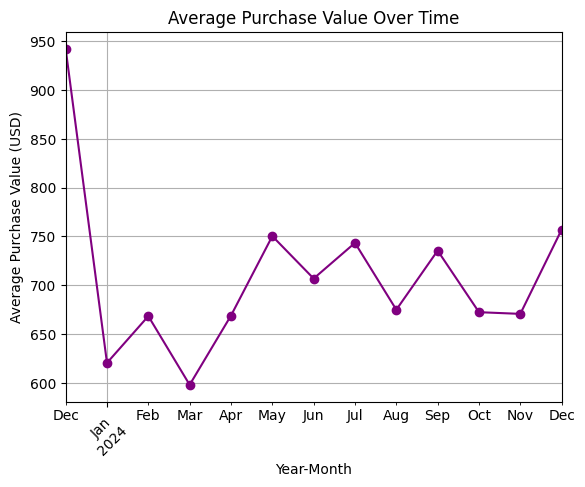

In [18]:
# Assuming 'TransactionDate' and 'TotalValue' are available
transactions['YearMonth'] = transactions['TransactionDate'].dt.to_period('M')
avg_purchase_value = transactions.groupby('YearMonth')['TotalValue'].mean()

avg_purchase_value.plot(kind='line', marker='o', color='purple')
plt.title("Average Purchase Value Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Average Purchase Value (USD)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


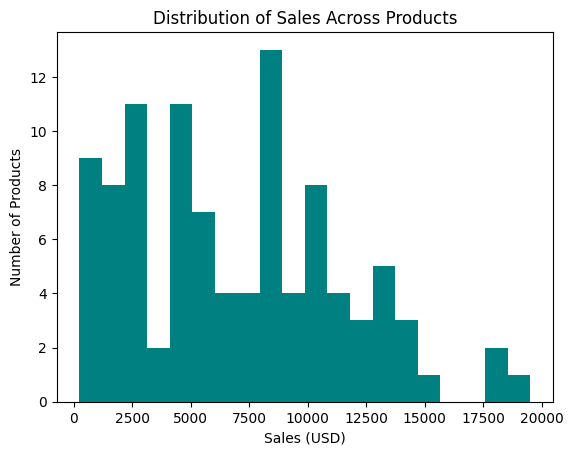

In [20]:
# Assuming 'ProductID' and 'TotalValue' are in the transactions dataframe
product_sales_distribution = transactions.groupby('ProductID')['TotalValue'].sum().sort_values()

product_sales_distribution.plot(kind='hist', bins=20, color='teal')
plt.title("Distribution of Sales Across Products")
plt.xlabel("Sales (USD)")
plt.ylabel("Number of Products")
plt.show()
